In [300]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw3.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [301]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with slighlty longer output. Avoid excessively long output.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

### Import Libraries

In [302]:
from collections import Counter
import math
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn.utils import resample

from warnings import simplefilter
simplefilter('ignore', category=FutureWarning)

In [303]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [4 pts]**](#part1)

- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [22 pts]**](#part2)

- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)

- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)

- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)

- [**Question 6: Improving model consistency with LASSO regularization [26 pts]**](#part6)

- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for modeling a quantitative variable. Specifically, we will model the percent change in a bacteria population after 4 hours as a function of the bacteria's "spreading factor".

**The data set for this problem has already been split for you.** You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively.

### Problem Description

We will predict the percentage change in population, given the spreading factor. Thus, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. Using mean squared error ($MSE$) as an evaluative criteria, we will explore several different approaches for finding the best fit and most robust polynomial regression for modeling this relationship.

<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [4 pts]</div> 
    
[Return to contents](#contents)
    

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Generate a *well-labeled* scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

In [304]:
df_test = pd.read_csv("data/bacteria_test.csv")
df_train = pd.read_csv("data/bacteria_train.csv")

df_train

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745
...,...,...
418,-0.461,-1.536030
419,2.179,1.445470
420,6.328,1.107800
421,3.854,0.841114


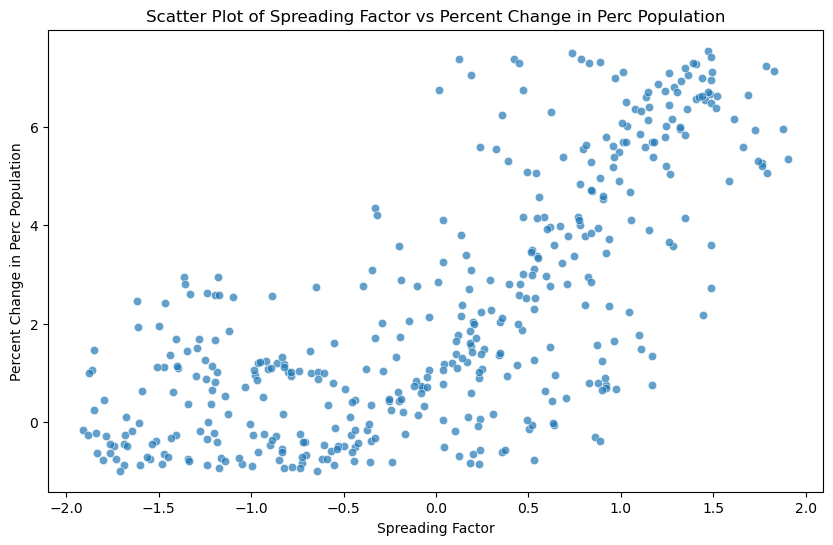

In [305]:
# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x="Spreading_factor", y="Perc_population", alpha=0.7)
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Scatter Plot of Spreading Factor vs Percent Change in Perc Population")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

Based on the graph above, is there any discernable relationship between the spreading factor and percentage change in population? If so, how would you describe this relationship?

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Yes, there is a clear relationship between spreading factor and percent change in perc population. As the spreading factor increases, the percent change in perc population also increases. This relationship does not appear to be linear, though, but rather quadratic; it seems like higher values of spreading factor (i.e. when spreading factor > 0) affect percent change in perc population _more_ than smaller values (i.e. when spreading factor < 0). 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap throught the notebook**

![](./data/roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [22 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.1</b></div>

Based on your inspection in question 1, guesstimate the degree of the polynomial you believe would best fit the training while still generalizing well. Store this degree in the variable `guessed_deg`. 

Next, use `PolynomialFeatures()` to generate a design matrices of the guesstimated degree for the train and test data. Store these in `x_poly_train` and `x_poly_test`. 

**Notes:**
- **You don't need to scale your data in this assignment** (you can inspect the data to see why this might not be necessary)
- **You should *not* include a bias in the design matrix you intend to pass to the linear regression's `fit` method.**

In [306]:
# your code here
guessed_deg = 2
x_poly_train = PolynomialFeatures(guessed_deg, include_bias = False).fit_transform(df_train[["Spreading_factor"]])
y_train = df_train["Perc_population"]

x_poly_test = PolynomialFeatures(guessed_deg, include_bias = False).fit_transform(df_test[["Spreading_factor"]])
y_test = df_test["Perc_population"]

In [307]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2</b></div>

Fit a polynomial regression using scikit-learn's `LinearRegression()` on the training design matrix. 

To track and compare the performance of each of the models in this notebook, use a list of dictionaries called `results`.

Each dictionary in this list will have the keys: 'model' (a string representing the question number where the model was fit), 'train_mse', and 'test_mse'.

So, for this question, you will append a dictionary to `results` of the form:
```python
{'model': '2.2', 'train_mse': 2.6749 'test_mse': 2.734}
```
Note that your MSE scores will not be the same as those in the example dictionary.

**Hint:** Because you will be calculating MSEs for models through this notebook, you may want to abstract this process into a function for re-use.

In [308]:
results = []
# Function to extract info
def get_info(model, x_train, x_test, y_train, y_test, question = None):
    model_name = ""
    if question:
        model_name = str(question)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate the MSEs
    train_mse = round(float(mean_squared_error(y_train, y_train_pred)), 5)
    test_mse = round(float(mean_squared_error(y_test, y_test_pred)), 5)
    
    d = {"model": model_name, "train_mse": train_mse, "test_mse": test_mse}
    return d

# function to get curve
def get_curve(model, x_train):
    return model.predict(x_train)

# Fit a linear regression model
model_1 = LinearRegression().fit(X = x_poly_train, y = y_train)

# Append model results
results.append(get_info(model_1, x_poly_train, x_poly_test, y_train, y_test, question = 2.2))

results

[{'model': '2.2', 'train_mse': 2.66172, 'test_mse': 2.67486}]

In [309]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.66172,2.67486


In [310]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3</b></div>

- Create a plot showing both the train and test data, as well as your model's prediction curve.
- Display `results` as a DataFrame.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The reason I chose a polynomial of degree two is because it looks like there are "increasing returns to scale" --- in other words, as the spreading factor increases, the effect on the percent change in population also increases. The fit of my model is pretty good. A 2.68 mean squared error suggests that, on average, my model prediction is only off by about plus/minus 1.6 for each data point.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

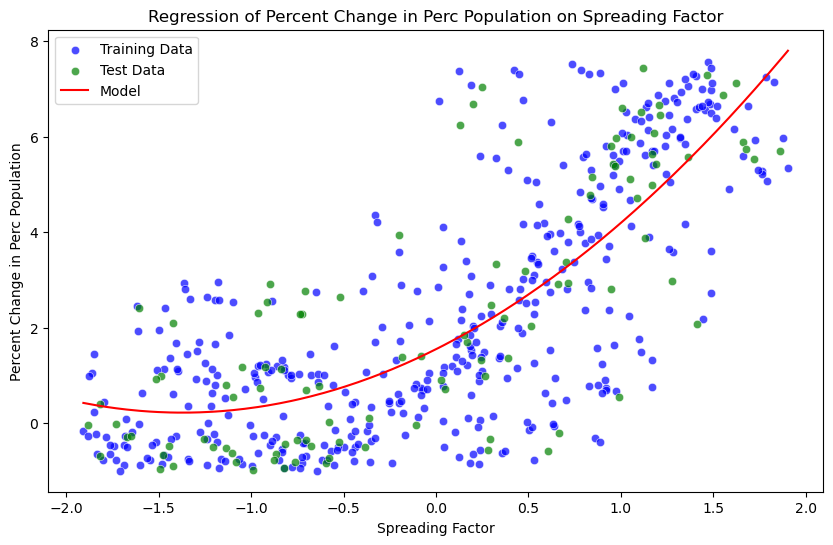

  model  train_mse  test_mse
0   2.2    2.66172   2.67486


In [311]:
# scatterplot with regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_train, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Training Data', color = "blue")
sns.scatterplot(data = df_test, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Test Data', color = "green")
sns.lineplot(data = df_train, x="Spreading_factor", y=get_curve(model_1, x_poly_train), color='red', label="Model" )
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Regression of Percent Change in Perc Population on Spreading Factor")
plt.show()

print(pd.DataFrame(results))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.4</b></div>

Now we will compute confidence intervals for the coefficients generated by our model specification. For the same degree polynomial regression fit above in 2.2, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:
- Report the coefficient values of the model fit above in 2.2.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data. You should use **100 bootstrapped samples**.
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**Note:** Our use of the term "coefficients" includes the intercept. So the intercept should also get a confidence interval plot.

**Hints:** Wrapping your plotting code in a function may make the solution to the next question more concise.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Below is a grid of plots depicting the distributions for each coefficient in my linear regression model. All coefficients are significantly not equal to zero. All are positive. Note that the intercept has the highest variance --- its 95% confidence interval is between 1.3 and 1.8, a 0.5 point difference, whereas the coefficient for beta 1 is spread between 1.8 and 2.1 and the coefficient for beta 2 is spread between 0.6 and 0.9, only a 0.3 point difference. All distributions look roughly normal, with center at the estimated value, though there are not enough bootstrapped samples for the distributions to be entirely filled out.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [312]:
# your code here
def bootstrap(X, y, model, n_iterations=100, ci=95):
    coefs = np.zeros((n_iterations, X.shape[1] + 1))

    # bootstrapping
    for i in range(n_iterations):
        X_bootstrap, y_bootstrap = resample(X, y, random_state=i)

        # Clone and fit the model
        model_clone = clone(model).fit(X_bootstrap, y_bootstrap)
                
        # Add intercept as the first element, followed by coefficients
        coefs[i, 0] = model_clone.intercept_
        coefs[i, 1:] = model_clone.coef_
    
    # Create the result list for each coefficient
    result = []
    for i in range(coefs.shape[1]):
        values = coefs[:, i]
        lower_bound = np.percentile(values, (100 - ci) / 2)
        upper_bound = np.percentile(values, 100 - (100 - ci) / 2)
        result.append({
            'coef': round(float(model.intercept_), 3) if i == 0 else round(float(model.coef_[i - 1]), 3),  # original model coefficient
            'values': values.tolist(),  # list of bootstrapped values
            'lower_bound': round(float(lower_bound), 3),
            'upper_bound': round(float(upper_bound), 3)
        })

    return result

bootstrap_results = bootstrap(x_poly_train, y_train, model_1, n_iterations = 100, ci = 95)

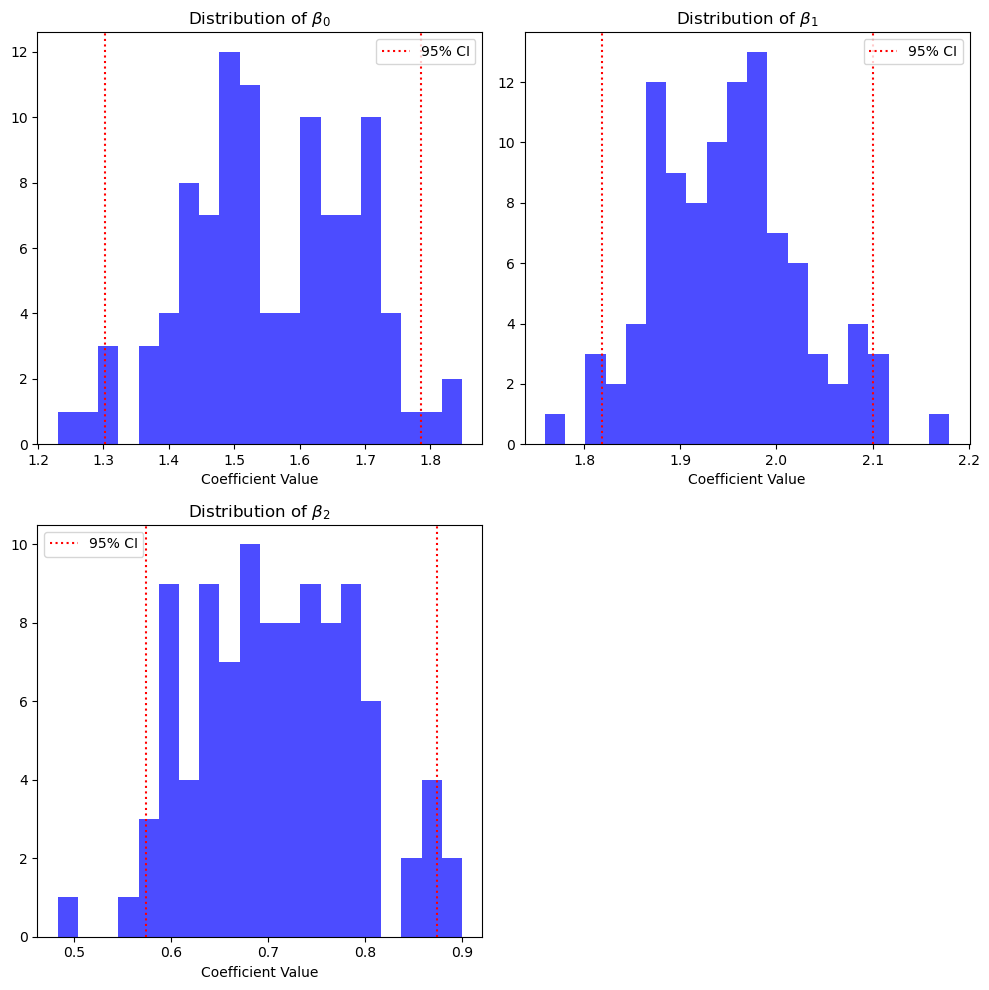

In [313]:
# Create grid of subplots
n_coefs = len(bootstrap_results)
n_rows = (n_coefs + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, result in enumerate(bootstrap_results):
    ax = axes[i]
    
    # plot histogram
    ax.hist(result['values'], bins=20, color='blue', alpha=0.7)
    
    # add title
    title = f"Distribution of $\\beta_{i}$"
    ax.set_title(title)
    
    # add red vertical lines for confidence intervals
    ax.axvline(result['lower_bound'], color='red', linestyle='dotted', label='95% CI')
    ax.axvline(result['upper_bound'], color='red', linestyle='dotted')
    
    # label the x-axis
    ax.set_xlabel('Coefficient Value')

    # add legend
    ax.legend()
    
# Hide any unused subplots if n_coefs is less than rows*cols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.5</b></div>

Linear regression can be viewed probabilistically, with deviations from the regression line attributed to an error term, $ \epsilon $, distributed as:

$$ \epsilon \sim N(0, \sigma^2) $$

In this question, you'll estimate confidence intervals for the regression coefficients based on this probabilistic perspective. Follow these steps:

1. Compute $ \hat{\sigma}_\epsilon^2 $, an estimate for the variance of the error term.
2. Utilizing this estimated variance, derive the standard errors for your regression coefficients.
3. Construct 95% confidence intervals for the coefficients using their standard errors. For the z-value, use 1.96.
4. Visualize the 95% confidence intervals alongside those from the bootstrap method. The values of the interval bounds should be made explicit in the plot.

**Hints:**
- Ensure your design matrix, $ X $, includes an intercept column to compute a confidence interval for $ \beta_0 $.
- Bootstrap samples play no role in this calculation.

[0.11555315 0.08116661 0.08496638]


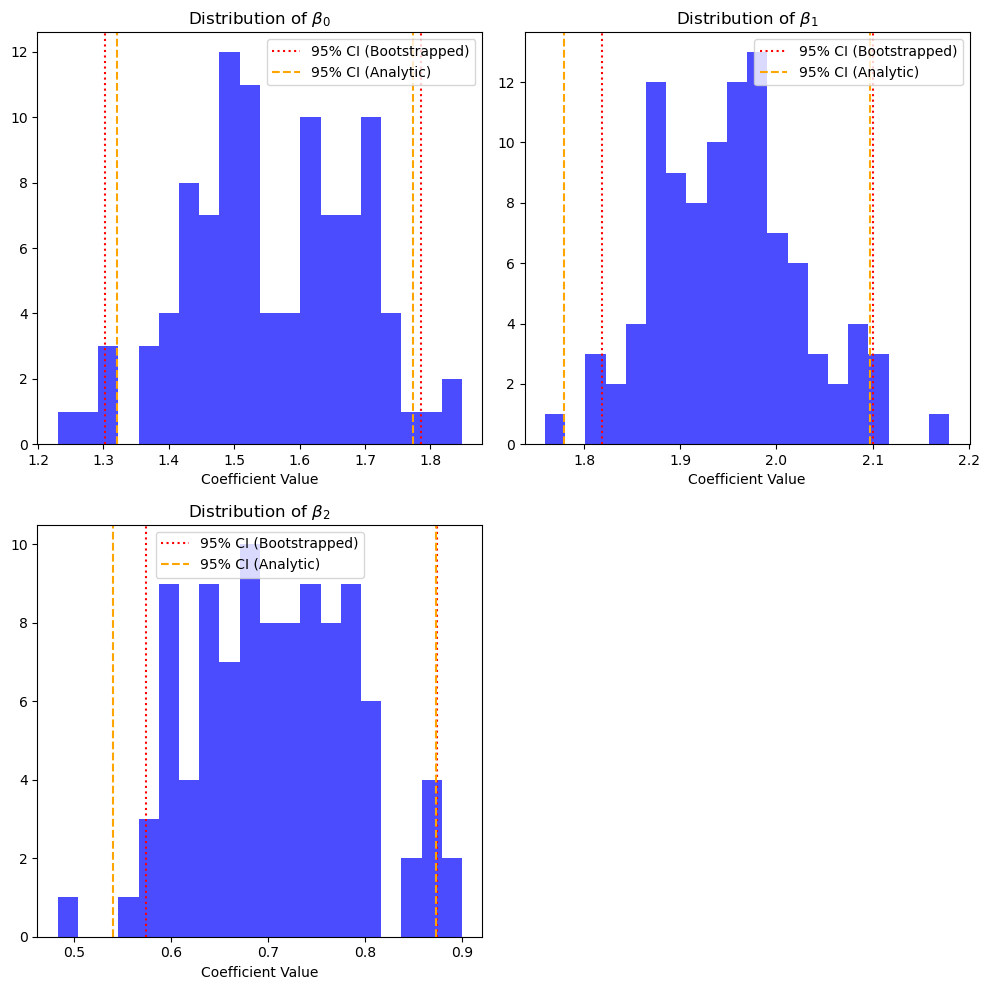

[{'coef': 1.548, 'lower_bound': 1.321, 'upper_bound': 1.774},
 {'coef': 1.938, 'lower_bound': 1.779, 'upper_bound': 2.097},
 {'coef': 0.706, 'lower_bound': 0.54, 'upper_bound': 0.873}]

In [314]:
# compute the residuals
y_train_pred = model_1.predict(x_poly_train)
residuals = y_train - y_train_pred
n, p = x_poly_train.shape

# estimate variance of the error term
s2 = np.sum(residuals ** 2) / (n - p - 1)

# calculate standard errors
X_design = np.hstack([np.ones((n, 1)), x_poly_train])  # add intercept
se = np.sqrt(s2 * np.diag(np.linalg.inv(X_design.T @ X_design)))
print(se)
# construct confidence intervals
z = 1.96
confidence_intervals = []
for i, beta_hat in enumerate(np.concatenate(([model_1.intercept_], model_1.coef_))):
        lower_bound = beta_hat - z * se[i]
        upper_bound = beta_hat + z * se[i]
        confidence_intervals.append({"coef": round(float(beta_hat), 3), "lower_bound": round(float(lower_bound), 3), "upper_bound": round(float(upper_bound), 3)})

# graph both bootstrap confidence intervals and regular confidence intervals
# Create grid of subplots
n_coefs = len(bootstrap_results)
n_rows = (n_coefs + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, result in enumerate(bootstrap_results):
    ax = axes[i]
    
    # plot histogram
    ax.hist(result['values'], bins=20, color='blue', alpha=0.7)
    
    # add title
    title = f"Distribution of $\\beta_{i}$"
    ax.set_title(title)
    
    # Add red vertical lines for confidence intervals
    ax.axvline(result['lower_bound'], color='red', linestyle='dotted', label='95% CI (Bootstrapped)')
    ax.axvline(result['upper_bound'], color='red', linestyle='dotted')
    
    # Add red vertical lines for confidence intervals
    ax.axvline(confidence_intervals[i]['lower_bound'], color='orange', linestyle='dashed', label='95% CI (Analytic)')
    ax.axvline(confidence_intervals[i]['upper_bound'], color='orange', linestyle='dashed')
    
    # Label the x-axis
    ax.set_xlabel('Coefficient Value')

    # add legend
    ax.legend()
# Hide any unused subplots if n_coefs is less than rows*cols
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

confidence_intervals

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.6</b></div>

Reflect on the differences between the two sets of confidence intervals. Demonstrate at least one diagnostic making use of the model and/or training data to explore the potential reasons for any observed discrepancies in the confidence intervals. Be sure to explain the relevance of your diagnostic(s) to this particular task and interpret the results.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

To calculate the analytic solutions for the standard errors of each coefficient, we need to assume that the errors are homoskedastic, i.e. the spread of the residuals is constant no matter the value of the predictors. To see if homoskedasticity is, in fact, present, we can plot each value of x versus the residuals. They should be centered at zero with constant spread.

However, in both plots below, we can see that there is some heteroskedasticity. The residuals tend to increase in variance as the Spread factor increases, but they tend to decrease in variance as the square of the spread factor increase. This relationship suggests that there is some heteroskedasticity, which means we cannot assume that our analytic estimates for the error are perfectly accurate.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

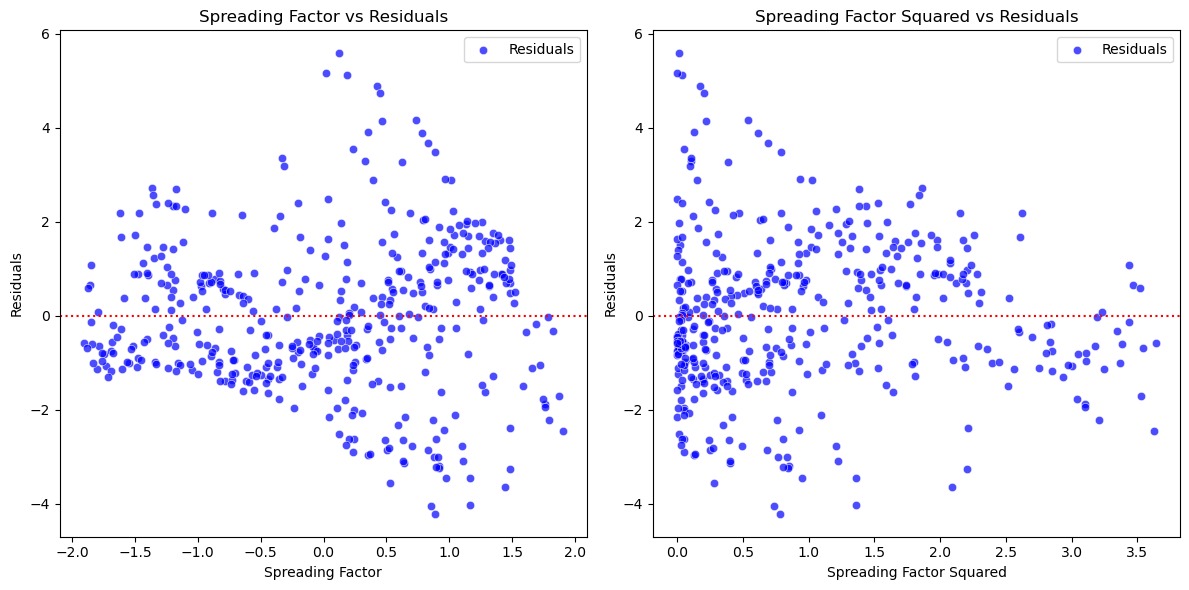

In [315]:
# Create side-by-side plots (2 subplots in 1 row)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatterplot (for the first predictor)
sns.scatterplot(x=x_poly_train[:, 0], y=residuals, ax=axes[0], alpha=0.7, label='Residuals', color='blue')
axes[0].axhline(0, color='red', linestyle='dotted')
axes[0].set_xlabel('Spreading Factor')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Spreading Factor vs Residuals')

# Second scatterplot (for the second predictor)
sns.scatterplot(x=x_poly_train[:, 1], y=residuals, ax=axes[1], alpha=0.7, label='Residuals', color='blue')
axes[1].axhline(0, color='red', linestyle='dotted')
axes[1].set_xlabel('Spreading Factor Squared')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Spreading Factor Squared vs Residuals')

# Adjust layout
plt.tight_layout()
plt.show()



<!-- END QUESTION -->

<a id="part3"></a>

## <div class='exercise'>Question 3: Single validation set [12 pts]</div> 

In this section you'll find the best degree polynomial relationship using a single validation set.

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1</b></div>

Split your original training data such that you separate out 20% into a single validation split. Use `random_state=1` and save the resulting splits as `x_train80`, `x_val`, `y_train80`, `y_val`. (This will prevent the overwriting of the original train data variables).

In [316]:
seed = 1
x_train80, x_val, y_train80, y_val = train_test_split(df_train[["Spreading_factor"]], df_train["Perc_population"], train_size=0.8, random_state=seed)

In [317]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2</b></div>

- Fit polynomial regression models for **degrees 1 to 30 (inclusive)** on the 80% training set (one model for each degree polynomial regression).
- Store the train and validation MSE values for each model in lists called `train_mses` and `val_mses`.

In [318]:
train_mses = []
val_mses = []
degrees = np.arange(1, 31)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly_train = poly.fit_transform(x_train80)
    x_poly_val = poly.transform(x_val)
    
    model = LinearRegression().fit(x_poly_train, y_train80)

    info = get_info(model, x_poly_train, x_poly_val, y_train80, y_val)
    
    train_mses.append(info["train_mse"])
    val_mses.append(info["test_mse"])

In [319]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.3</b></div>

- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Identify and report the degree for which the validation error is lowest.

**Note:** Plotting the MSE on a log scale may be helpful.

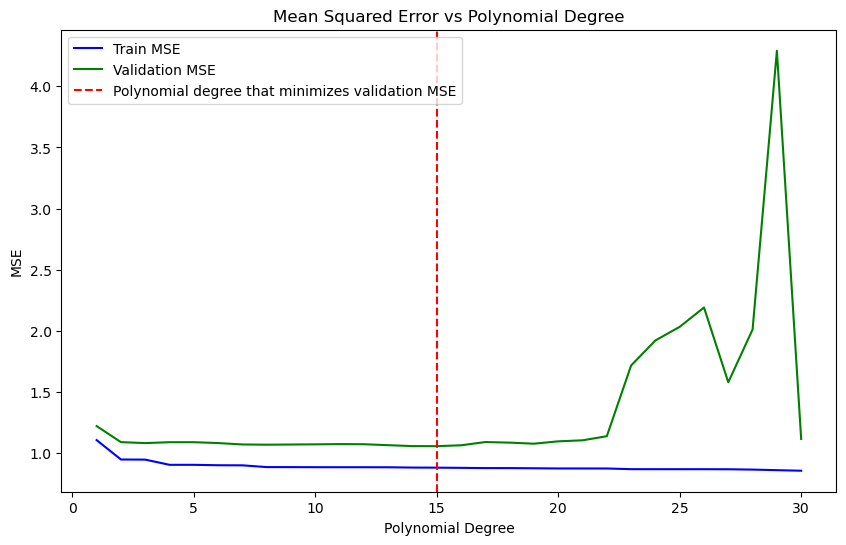

In [320]:
# your code here

best_degree = degrees[np.argmin(val_mses)]

plt.figure(figsize=(10, 6))
sns.lineplot(x=degrees, y=np.log(train_mses), label='Train MSE', color='blue')
sns.lineplot(x=degrees, y=np.log(val_mses), label='Validation MSE', color='green')
plt.axvline(x=best_degree, color='red', linestyle='dashed', label=f'Polynomial degree that minimizes validation MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.legend()
plt.show()

In [321]:
# your code here

print(f"The polynomial degree that minimizes the validation MSE is {best_degree}")

The polynomial degree that minimizes the validation MSE is 15


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.4</b></div>

Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). 

Append a new dictionary to your `results` list for this model.

In [322]:
# your code here
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
x_poly_train = poly.fit_transform(df_train[["Spreading_factor"]])
y_train = df_train["Perc_population"]

x_poly_test = poly.fit_transform(df_test[["Spreading_factor"]])
y_test = df_test["Perc_population"]

model_2 = LinearRegression().fit(x_poly_train, y_train)

results.append(get_info(model_2, x_poly_train, x_poly_test, y_train, y_test, question = 3.4))

In [323]:
# Display your results thus far.
pd.DataFrame(results)

,model,train_mse,test_mse
0,2.2,2.66172,2.67486
1,3.4,2.49095,2.73648


In [324]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.5</b></div>

Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

The model seems to fit the data fairly well, except it looks like it has been overfit. The degree of the polynomial is super high, 15, which means that it may not be the most generalizable to test data. This is reflected in the performance on the test data. Also, a degree of 15 is really not the most interpretable, which makes it hard to draw conclusions about the impact of the spreading factor on the precent change in perc population. Compared to model 2, it is much more complex and less biased on the training data, though.

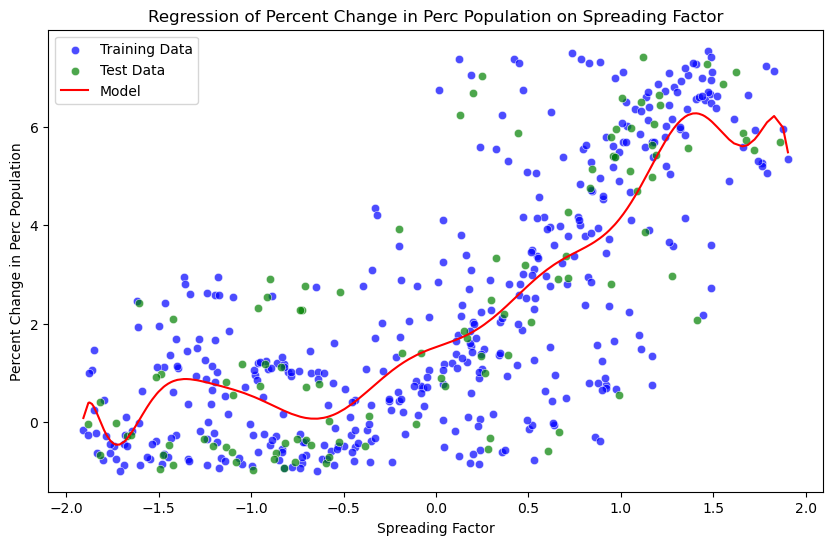

  model  train_mse  test_mse
0   2.2    2.66172   2.67486
1   3.4    2.49095   2.73648


In [325]:
# scatterplot with regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_train, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Training Data', color = "blue")
sns.scatterplot(data = df_test, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Test Data', color = "green")
sns.lineplot(data = df_train, x="Spreading_factor", y=get_curve(model_2, x_poly_train), color='red', label="Model" )
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Regression of Percent Change in Perc Population on Spreading Factor")
plt.show()

print(pd.DataFrame(results))

<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation. Note that `cross_validation` should be passed *all* training examples (*not* the 80% split from the previous question).

- Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ for each polynomial regression from **degree 1 to 30 (inclusive)**.
- For each degree:
    - store the mean train MSE across all $k$ folds in the list `train_mses_mean`
    - store the mean validation MSE across all $k$ folds in the list `val_mses_mean`
    - store the standard deviation  of the validation MSE across all $k$ folds in the list `val_mses_std`
    

In [326]:
X_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

train_mses_mean = []
val_mses_mean = []
val_mses_std = []

for degree in range(1, 31):
    
    # create feature matrix
    X_poly_train = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X_train)
    
    model = LinearRegression()
    
    # Perform 10-fold cross-validation
    cv_results = cross_validate(model, X_poly_train, y_train, cv=10, 
                                scoring='neg_mean_squared_error', 
                                return_train_score=True)
    
    # Compute mean and std of train and validation MSEs
    train_mse_mean = -np.mean(cv_results['train_score'])
    val_mse_mean = -np.mean(cv_results['test_score'])    
    val_mse_std = np.std(cv_results['test_score'])
    
    # Append results to the lists
    train_mses_mean.append(train_mse_mean)
    val_mses_mean.append(val_mse_mean)
    val_mses_std.append(val_mse_std)


In [327]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.2 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The training mse monotonically decreases. This makes sense --- the higher the degree, the better itwill fit on the training data. The tradeoff is on the validation data --- the higher the degree, the less generalizable the model is, because it is more sensitive to small shifts in the training data. Thus, as the degree increases, the validation MSE decreases for a time, but then there is an inflection point where it starts increasing again. For the graph below, that inflection point occurs when degree = 8. Interestingly, the standard deviation also substantially increases as the degree increases, for the same reasons.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

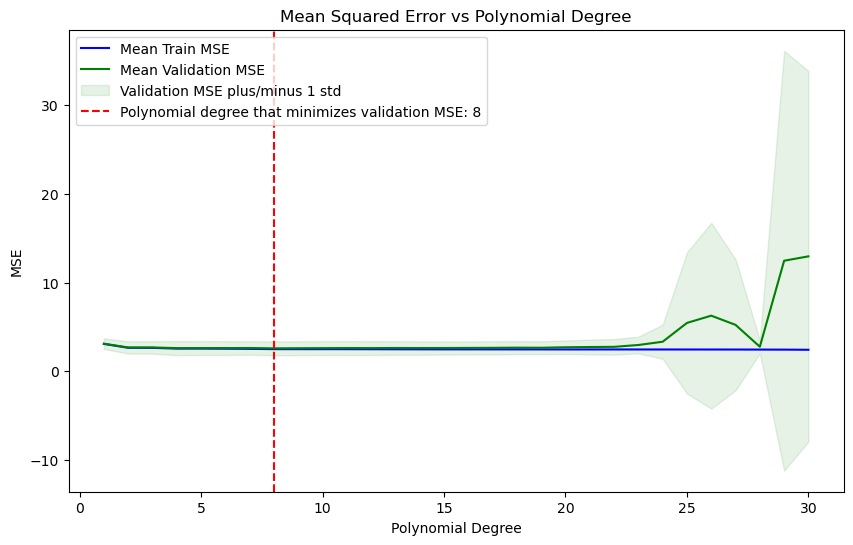

Best degree: 8
Best validation mse: 2.5990753511998657
Corresponding train mse: 2.5075391713331903


In [328]:
best_degree = degrees[np.argmin(val_mses_mean)]
best_val_mse = np.min(val_mses_mean)
best_train_mse = train_mses_mean[best_degree]

plt.figure(figsize=(10, 6))
sns.lineplot(x=degrees, y=train_mses_mean, label='Mean Train MSE', color='blue')
sns.lineplot(x=degrees, y=val_mses_mean, label='Mean Validation MSE', color='green')
plt.fill_between(degrees, 
                 np.array(val_mses_mean) - np.array(val_mses_std), 
                np.array(val_mses_mean) + np.array(val_mses_std), 
                 color='green', alpha=0.1, label="Validation MSE plus/minus 1 std")
plt.axvline(x=best_degree, color='red', linestyle='dashed', label=f'Polynomial degree that minimizes validation MSE: {best_degree}')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.legend()
plt.show()

print(f"Best degree: {best_degree}")
print(f"Best validation mse: {best_val_mse}")
print(f"Corresponding train mse: {best_train_mse}")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Fit the best model based on the entire training data and report the $MSE$.


- For the best degree polynomial regression identified in Question 4.2 above, train on the complete training data and predict on the test data.
- Append a new dictionary for this model to the `results` list. 

In [329]:
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
x_poly_train = poly.fit_transform(df_train[["Spreading_factor"]])
y_train = df_train["Perc_population"]

x_poly_test = poly.fit_transform(df_test[["Spreading_factor"]])
y_test = df_test["Perc_population"]

model_3 = LinearRegression().fit(x_poly_train, y_train)

results.append(get_info(model_3, x_poly_train, x_poly_test, y_train, y_test, question = 4.3))

In [330]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

- Generate a plot of the data and your regression curve (similar to [Question 2.3](#part2)).
- Display the coefficients of your model.
- Display `results` as a DataFrame (there should now be 3 entries).
- Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

This model fits the data quite well --- it has the lowest MSE of all the models evaluated thus far. In addition, the model has a lower degree than the one I calculated in Question 3, which means it is likely less overfit, and better generalizable to new test data. 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

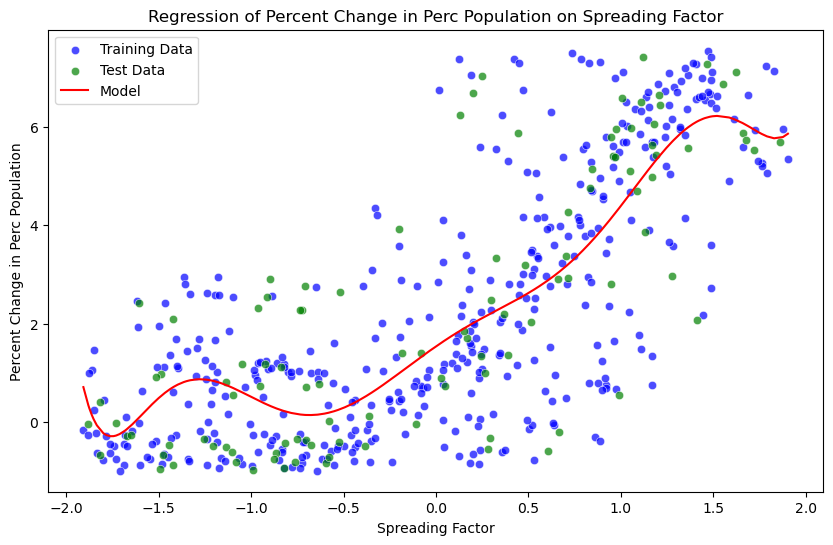

  model  train_mse  test_mse
0   2.2    2.66172   2.67486
1   3.4    2.49095   2.73648
2   4.3    2.51252   2.61301


In [331]:
# scatterplot with regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_train, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Training Data', color = "blue")
sns.scatterplot(data = df_test, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Test Data', color = "green")
sns.lineplot(data = df_train, x="Spreading_factor", y=get_curve(model_3, x_poly_train), color='red', label="Model" )
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Regression of Percent Change in Perc Population on Spreading Factor")
plt.show()

print(pd.DataFrame(results))

<!-- END QUESTION -->

<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.1</b></div>

In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.4](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation.

- Similar to Question 2.4, **use 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with $k=10$ *for each polynomial regression* of **degrees 1 to 30 (inclusive)**.
  - Select the best degree polynomial based on the lowest mean cross-validation MSE and store this degree in a list called `best_degrees`.
- After completing your bootstraps, `best_degrees` should have 100 elements, one degree for each completed bootstrap.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

In [332]:
# your code here
n_iterations=100

X_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

best_degrees = []

# bootstrapping
for i in range(n_iterations):
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=i)
    
    # store val mses in list
    val_mses_mean = []
    degrees = np.arange(1, 31)
    # for each boootstrap, cross validate
    for degree in degrees:
    
        # create feature matrix
        X_poly_train = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X_bootstrap)
        
        model = LinearRegression()
        
        # Perform 10-fold cross-validation
        cv_results = cross_validate(model, X_poly_train, y_bootstrap, cv=10, 
                                    scoring='neg_mean_squared_error', 
                                    return_train_score=True)
        
        val_mses_mean.append(-np.mean(cv_results['test_score']))
    
    # pick best degree
    best_degree = degrees[np.argmin(val_mses_mean)]
    
    # append to list
    best_degrees.append(int(best_degree))


In [333]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

Generate a well-labeled bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the `best_degrees` saved during your bootstraps.

**Hint:** You may want to make use of `Counter` which has been imported for your from the `collections` module of the standard Python library.

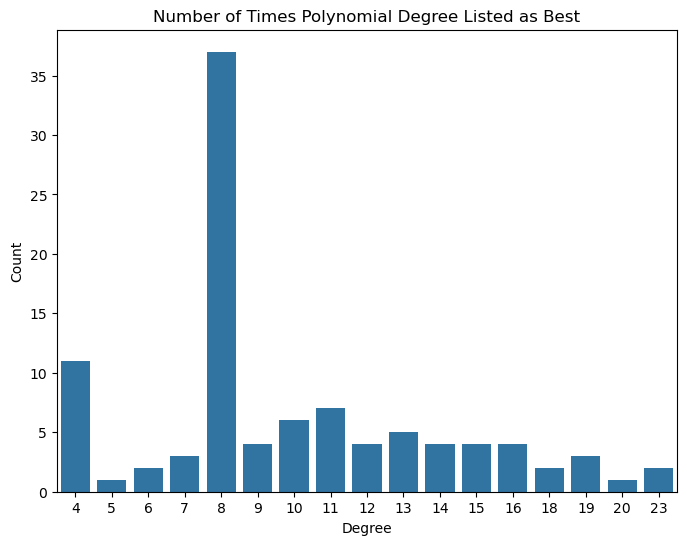

In [334]:
# your code here
counts = Counter(best_degrees)
x_values = list(counts.keys())
y_values = list(counts.values())

# Create a Seaborn bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=x_values, y=y_values)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Number of Times Polynomial Degree Listed as Best')

# Show the plot
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.3</b></div>

What are your observations from the plot above? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

1) There is so much variation because higher-degree polynomials can be prone to overfitting. Thus, they may perform very well on some bootstrap samples (by fitting the noise), while they may overfit and generalize poorly on others. This overfitting could lead to variability in selecting different polynomial degrees as the best fit.
2) I will choose a degree 8 polynomial. This is because it is the most common result from all bootstrapped results, which means that even when there is variation in the data, a degree 8 polynomial fits the best. This means that a degree 8 model is most likely to be generalizable to unseen test data. A degree 8 polynomial is less prone to overfitting than the higher degrees.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.4</b></div>

Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Append a new dictionary for this model to your `results` list. 

In [335]:
overall_best_degree = counts.most_common(1)[0][0]

poly = PolynomialFeatures(degree=overall_best_degree, include_bias=False)
x_poly_train = poly.fit_transform(df_train[["Spreading_factor"]])
y_train = df_train["Perc_population"]

x_poly_test = poly.fit_transform(df_test[["Spreading_factor"]])
y_test = df_test["Perc_population"]

model_4 = LinearRegression().fit(x_poly_train, y_train)

results.append(get_info(model_4, x_poly_train, x_poly_test, y_train, y_test, question = 5.4))

In [336]:
grader.check("q5.4")

q5.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.5</b></div>

- Generate a plot of the data and your regression curve.
- Display `results` as a DataFrame.
- Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The model is identical to the model produced in question 4. This is because the cross validation in Question 4 happened to produce the same best degree as the mode of all the bootstrapped best degrees. As before, the mdoel fits the data quite well; it is less overfit than the model in Question 3, and it has the lowest test MSE of all the other models, which suggests that it is the best at fitting the data thus far.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

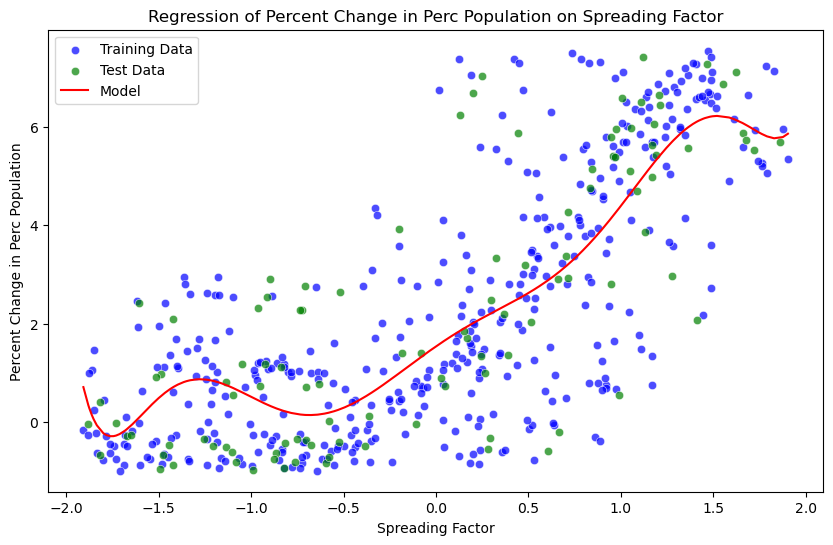

  model  train_mse  test_mse
0   2.2    2.66172   2.67486
1   3.4    2.49095   2.73648
2   4.3    2.51252   2.61301
3   5.4    2.51252   2.61301


In [337]:
# scatterplot with regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_train, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Training Data', color = "blue")
sns.scatterplot(data = df_test, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Test Data', color = "green")
sns.lineplot(data = df_train, x="Spreading_factor", y=get_curve(model_4, x_poly_train), color='red', label="Model" )
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Regression of Percent Change in Perc Population on Spreading Factor")
plt.show()

print(pd.DataFrame(results))

<!-- END QUESTION -->

<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [26 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to and including* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.1</b></div>

**Find the best hyper-parameter alpha, $\alpha$**

Use the `LassoCV` estimator to find the best regularization parameter from $\alpha \in [10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}]$
- Store the mean cross-validation MSEs across each fold in `lassoCV_val_mses_mean`
- Save the best $\alpha$ based on the mean cross-validation MSE in `best_alpha`

You should read the documentation for [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Some important information about this estimator:
- After calling `fit`, the model is now the one fit on the entire training data using the best alpha based on the mean CV MSE.
- the `mse_path_` attribute contains the validation scores on each fold for each candidate alpha.
- the `alpha_` attribute contains the best regularization parameter found through cross-validation

**Tips:** You should try adjusting `LassoCV`'s `max_iter` argument to prevent convergence warnings. If you are unable to prevent them with a large number of iterations (~100,000) then you can silence them with:
```{python}
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
```
Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.

In [338]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

X_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
degree = 30


# create feature matrix
poly = PolynomialFeatures(degree=30, include_bias = False)
X_poly_train = poly.fit_transform(X_train)

# initialize lasso
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(X_poly_train, y_train)

# mean cross-validation MSE for each alpha
lassoCV_val_mses_mean = np.mean(lasso_cv.mse_path_, axis=1)

# get best alpha
best_alpha = lasso_cv.alpha_

print("Mean cross-validation MSEs for each alpha:", lassoCV_val_mses_mean)
print("Best alpha:", best_alpha)


Mean cross-validation MSEs for each alpha: [2.64534955 2.58772088 2.60054423 2.60853959 2.61243039]
Best alpha: 0.01


In [339]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.2</b></div>

Generate two plots:
- One showing the mean validation $MSE$ values for each regularization parameter $\alpha$, identifying the best $\alpha$.
- Another showing the values of each coefficient in the LASSO model using the best $\alpha$. 

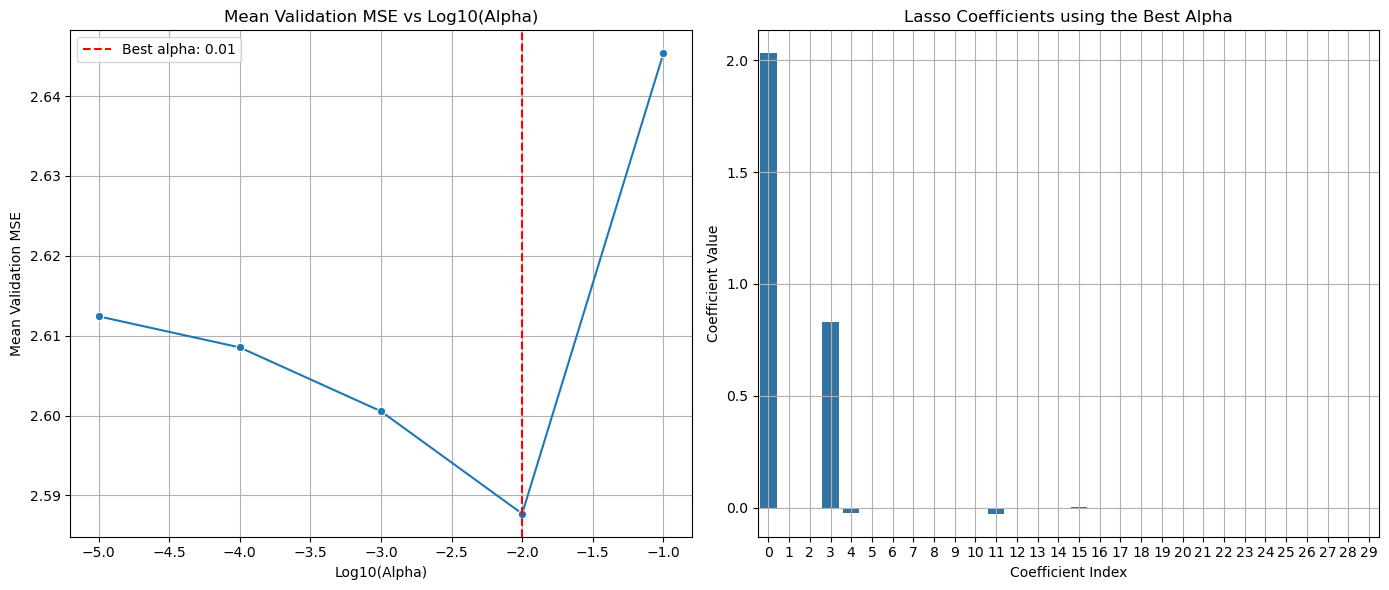

In [340]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# mean validation MSE for each alpha
sns.lineplot(x=np.log10(lasso_cv.alphas_), y=lassoCV_val_mses_mean, marker='o', ax=axs[0])
axs[0].axvline(np.log10(best_alpha), color='red', linestyle='--', label=f'Best alpha: {best_alpha}')
axs[0].set_xlabel('Log10(Alpha)')
axs[0].set_ylabel('Mean Validation MSE')
axs[0].set_title('Mean Validation MSE vs Log10(Alpha)')
axs[0].legend()
axs[0].grid(True)

# lasso coefficients using the best alpha
sns.barplot(x=np.arange(len(lasso_cv.coef_)), y=lasso_cv.coef_, ax=axs[1])
axs[1].set_xlabel('Coefficient Index')
axs[1].set_ylabel('Coefficient Value')
axs[1].set_title('Lasso Coefficients using the Best Alpha')
axs[1].grid(True)

plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.3</b></div>

**Find the most significant degrees**

**NOTE: The code for this question has been provided. It can take several minutes to run. Just be sure to answer the interpretation part of the question.**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I am choosing a maximum degree of 8. This is because all degrees above 8 are significant approximately zero percent of the time. The reason I am not going lower than 8 is because 8 is itself signficant over 50 percent of the time. This means that it is worth keeping.

Interestingly, the percent of the time that a given coefficient is signficiant decreases with degree. This makes sense --- it is more likely that the degree 1 polynomial will be significant, but the degree 8 polynomial will not be simply from the large amount of variance in the bootstrapped data.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_95461/1614806114.py:55: SyntaxWarning: invalid escape sequence '\m'
  f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "


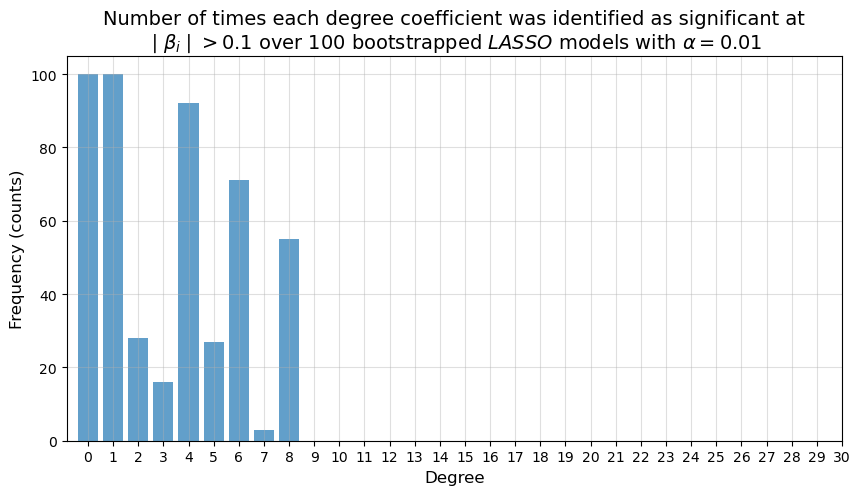

In [341]:
# your code here
# Set bootstrapping parameters
numboot = 100
max_degree = 30

significant_degrees = {}

# Perform bootstraps
df_train = pd.read_csv('data/bacteria_train.csv')

include_bias = False # No column of ones from PolynomialFeatures
fit_intercept = True # We will get it from LinearRegression.fit()

for i in range(numboot):
    df_boot = df_train.sample(frac=1, replace=True)
    x_train_boot = df_boot[["Spreading_factor"]]
    x_poly_train_boot = PolynomialFeatures(
        max_degree, include_bias=include_bias
    ).fit_transform(x_train_boot)
    y_train_boot = df_boot.Perc_population

    lasso = Lasso(
        fit_intercept=fit_intercept,
        max_iter=5_000,
        alpha=best_alpha,
    )
    lasso.fit(x_poly_train_boot, y_train_boot)
    
    if fit_intercept==True:
        coefficients = [lasso.intercept_, *lasso.coef_]
    else:
        # If you got your constant from PolynomialFeatures and not LinearRegression,
        # then the intercept is actually the first coef in the model.
        # But this would be problematic when using regularization. Can you see why?
        coefficients = lasso.coef_

    for i in np.where(np.abs(coefficients)>0.1)[0]:
        if i not in significant_degrees.keys():
            significant_degrees[i]=1
        else:
            significant_degrees[i]+=1

fig, ax = plt.subplots(figsize=(10,5))

lists = sorted(significant_degrees.items())

x, y = zip(*lists)

ax.bar(x, y, alpha=0.7)
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("Frequency (counts)", fontsize=12)
ax.set_xticks(range(max_degree+1))
ax.set_title(
    "Number of times each degree coefficient was identified as significant at\n"
    f"$\mid\\beta_i\mid > 0.1$ over {numboot} bootstrapped $LASSO$ models "
    f"with $\\alpha={best_alpha}$",
    fontsize=14,
)
plt.grid(":", alpha=0.4)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.4</b></div>

From our Question 6.3 results, we can see that only some degrees are consistently significant over many bootstraps.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.3 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Append a new dictionary for this model to your `results` list.

In [342]:
maximum_degree = 8

# create feature matrix
poly = PolynomialFeatures(degree=maximum_degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(df_test[["Spreading_factor"]])

# initialize lasso
model_5 = Lasso(alpha=best_alpha, fit_intercept=True, max_iter=100_000).fit(X_poly_train, y_train)

results.append(get_info(model_5, X_poly_train, X_poly_test, y_train, y_test, question = 6.4))

In [343]:
y_test.shape

(108,)

In [344]:
grader.check("q6.4")

q6.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.5</b></div>

- Generate a plot of the data and your regression curve.
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $)
- Display `results` as a DataFrame.

In [345]:
coefficients = model_5.coef_
model_coefs = pd.DataFrame(coefficients, columns=["Coefficient"])
degrees = list(range(1, len(model_coefs) + 1))

model_coefs["Degree"] = degrees

model_coefs = model_coefs[abs(model_coefs["Coefficient"]) > 0.1]
model_coefs

,Coefficient,Degree
0,2.013417,1
1,0.545334,2
3,0.765334,4
5,-0.356584,6


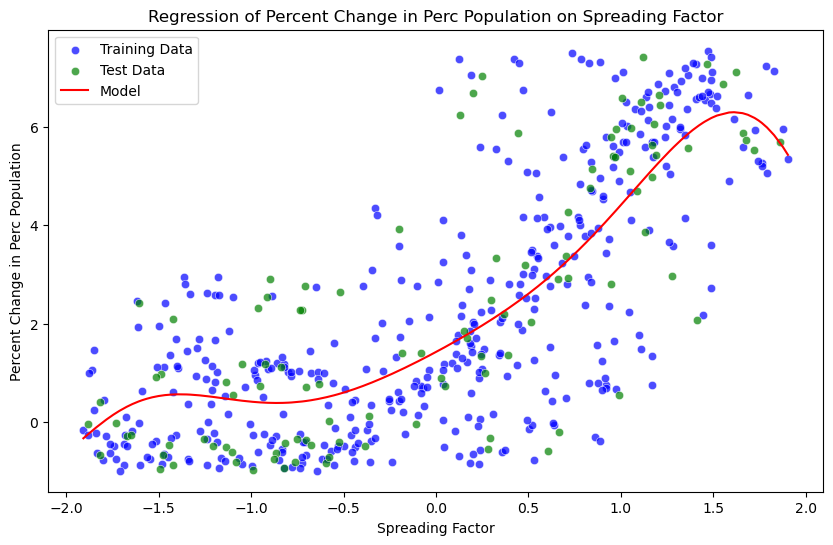

,model,train_mse,test_mse
0,2.2,2.66172,2.67486
1,3.4,2.49095,2.73648
2,4.3,2.51252,2.61301
3,5.4,2.51252,2.61301
4,6.4,2.55008,2.59015


In [346]:
# scatterplot with regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_train, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Training Data', color = "blue")
sns.scatterplot(data = df_test, x="Spreading_factor", y="Perc_population", alpha=0.7, label='Test Data', color = "green")
sns.lineplot(data = df_train, x="Spreading_factor", y=get_curve(model_5, x_poly_train), color='red', label="Model" )
plt.xlabel("Spreading Factor")
plt.ylabel("Percent Change in Perc Population")
plt.title("Regression of Percent Change in Perc Population on Spreading Factor")
plt.show()

pd.DataFrame(results)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q6.6</b></div>

**What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.4 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.4 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.4 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The best degree chosen in Question 5 is the same as the best degree chosen here. The above bootstrapping process indicated that the degree 8 is significant about 50 percent of the time.

Importantly, the MSE from this model is almost identical with the MSE in Question 5. This has a smaller test MSE by just .0002, an incredibly negligible amount.

That said, I believe my Question 6 model --- the one I just computed --- to be more reliable and robust than the previous models. In addition to it having the lowest test MSE, it also the one with the most tuned hyperparameters. In addition to selecting the optimal polynomial degree, it also has selected the optimal penalty term to shrink coefficients. This can help minimize the risk of overfitting, which increases the generalizability of the model.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.1</b></div>

Using the `results` list, generate a bar plot illustrating the test $MSE$ values for each of the models. Display `results` as a Dataframe as well.

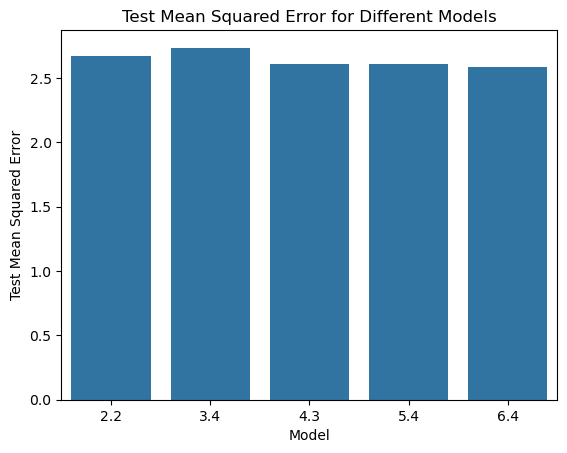

  model  train_mse  test_mse
0   2.2    2.66172   2.67486
1   3.4    2.49095   2.73648
2   4.3    2.51252   2.61301
3   5.4    2.51252   2.61301
4   6.4    2.55008   2.59015


In [347]:
# your code here
results_df = pd.DataFrame(results)
sns.barplot(data = results_df, x = "model", y = "test_mse")
plt.xlabel("Model")
plt.ylabel("Test Mean Squared Error")
plt.title("Test Mean Squared Error for Different Models")
plt.show()

print(results_df)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q7.2</b></div>

Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I would pick the Lasso model with degree equal to 8 --- the one I trained in 6.4. That is best because the bootstrap process indicates that the degree 8 coefficient is significant about 50 percent of the time, and no coefficients greater than 8 are significant at all. Second, LASSO shrinks coefficients by an appropriate penalty term to make sure that there aren't any extreme values and to help make the model generalizable to test data. The hyperparameters of this model has also been tuned.

As to the drawbacks, the main issue with LASSO is that it is computationally intensive. If I tried to repeate this process with a larger dataset, I might not be able to obtain a numerical solution in a reasonable timeframe.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I found that the calculation of standard errors to be quite tricky. Had to remember some stuff from linear algebra.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [348]:
hours_spent_on_hw = 15

In [349]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [350]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 0.54 minutes for this notebook to run


🌈 **This concludes HW3. Thank you!**

[Return to contents](#contents)